## Content 

1. Data Arrange and Train,Test
2. Logistic Regression Classification
3. KKN Classification
4. Support Vector Machine
5. Naive Bayes
6. Decision Tree Classification
7. Random Forest Classification
8. Confusion Matrix
9. Comparison of Algorithm Performance

In [3]:
#Data Arrange and Train,Test

import pandas as pd 

data = pd.read_csv("D:/ML Data/BreastCancer2.csv") # reading data from input file
data= data.drop(["id"],axis=1) # remove useless feature 

In [4]:
data.head() #data features and class

,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [5]:
data.shape

(683, 10)

In [7]:
x = data.drop(["class"],axis = 1) # x consist only features
y = data.loc[:,"class"] # y consist only class

print(x.iloc[0:5])
print(y.iloc[0:5])

   thickness  size  shape  adhesion  single  nuclei  chromatin  nucleoli  \
0          5     1      1         1       2       1          3         1   
1          5     4      4         5       7      10          3         2   
2          3     1      1         1       2       2          3         1   
3          6     8      8         1       3       4          3         7   
4          4     1      1         3       2       1          3         1   

   mitosis  
0        1  
1        1  
2        1  
3        1  
4        1  
0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64


In [9]:
# AttributeError: 'tuple' object has no attribute 'fit' Therefore we have to transform numpy array
x = data.drop(["class"],axis = 1).values 
y = data.loc[:,"class"].values

In [11]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42) # create a %33 test data from orginal data

print("x train shape:",x_train.shape)
print("x test shape:",x_test.shape)
print("y train shape:",y_train.shape)
print("y test shape:",y_test.shape)

x train shape: (546, 9)
x test shape: (137, 9)
y train shape: (546,)
y test shape: (137,)


## Logistic Classification

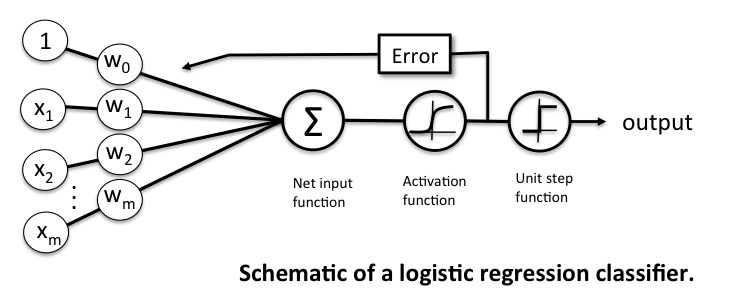

x : Features of data - Train part

w : weight - coefficient

net input fuction : z = w0x0 + w1x1 + ..... + wnxn

Activation function : Sigmoid fuction


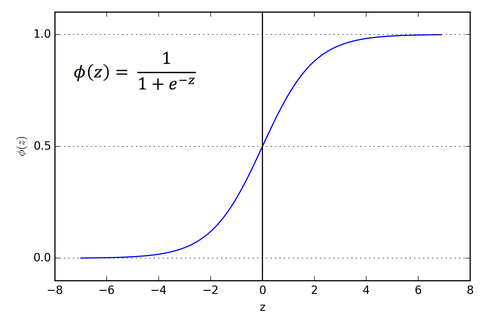

In [12]:
from sklearn.linear_model import LogisticRegressionCV # Use the sklearn module 
lrc = LogisticRegressionCV()
lrc.fit(x_train,y_train) 
print("logistic score",lrc.score(x_test,y_test)*100)

logistic score 94.16058394160584


# KKN classification KNN Algorithm is relying on feature similarity

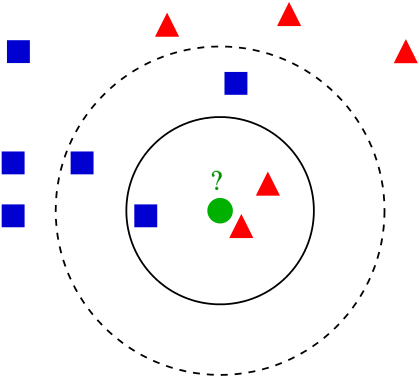

The green solid circle is test sample should be classified either to the first class of blue squares or to the second class of red triangles. If k = 3 (solid line circle) it is assigned to the second class because there are 2 triangles and only 1 square inside the inner circle. If k = 5 (dashed line circle) it is assigned to the first class (3 squares vs. 2 triangles inside the outer circle).

In [27]:
from  sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) # K values 
knn.fit(x_train,y_train)
print("KNN score",knn.score(x_test,y_test)*100)

KNN score 95.13274336283186


In [28]:
neighbors_list = []

for i in range(1,15):
    knn1 = KNeighborsClassifier(n_neighbors = i)
    knn1.fit(x_train,y_train)
    neighbors_list.append(knn1.score(x_test,y_test))
print(neighbors_list) # find finest k value for classification

[0.9513274336283186, 0.9380530973451328, 0.9513274336283186, 0.9380530973451328, 0.9513274336283186, 0.9557522123893806, 0.9513274336283186, 0.9513274336283186, 0.9513274336283186, 0.9513274336283186, 0.9513274336283186, 0.9513274336283186, 0.9513274336283186, 0.9513274336283186]


## Support Vector Machine

Support vector machine(SVM) use for regression and classification, but mostly use for classification. Datas are ploted as a point in n-dimensional space. Points positioning the particular coordinate due to their value.Then, draw line or plane(depens on dimension) for separate the two classes. Choose the line or plane which has maximum margin(distance called as margin).

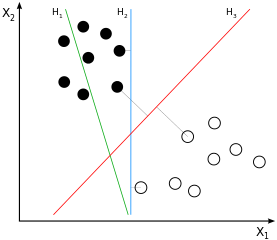

H1 does not separate the classes. H2 does, but only with a small margin. H3 separates them with the maximum margin.

In [29]:
from sklearn.svm import SVC
svc = SVC(random_state=1,gamma=0.22)
svc.fit(x_train,y_train)
print("SVC score",svc.score(x_test,y_test))

SVC score 0.9601769911504425


# Naive Bayes

Navie Bayes algorithm predict unknown data to classificate and do this process faster than other algorithms. It works on Bayes theorem of probability

In [30]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
print("Naive Boyes score",nb.score(x_test,y_test))

Naive Boyes score 0.9690265486725663


# Decision Tree Classification

Decision Tree Classification split the plot into subplot which incluede tree models where points can take values. Each split create leaves which present in the trees represent class label. 
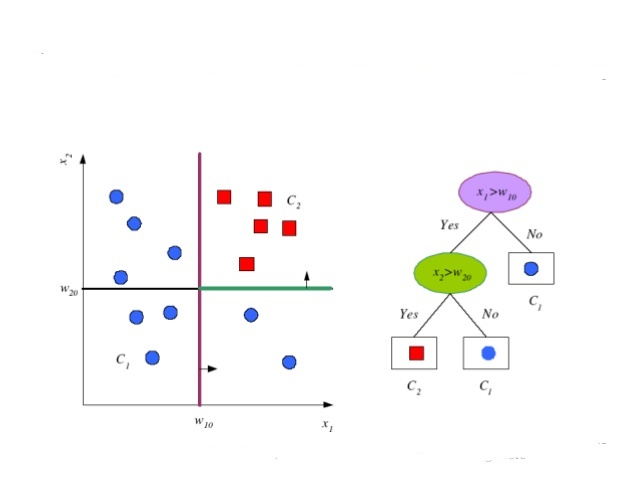

In [31]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("Decision Tree Score",dt.score(x_test,y_test))

Decision Tree Score 0.9469026548672567


# Random Forest Classification

This classification alghorithm is ensemble learning model. It take sum of the decision tree to one algorithmic process.

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, random_state=1)
rf.fit(x_train,y_train)
print("Random Forest Classification Score",rf.score(x_test,y_test))

Random Forest Classification Score 0.9601769911504425


# Confusion Matrix

Confusion matrix create a table which present visualization of performance of an algorithm

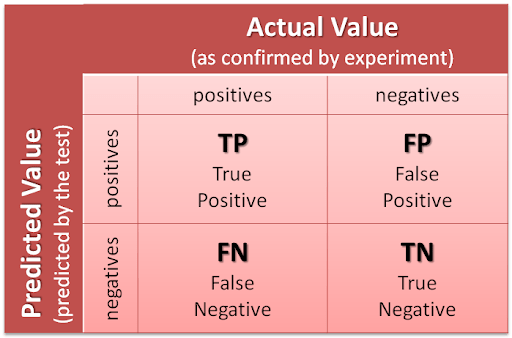

In [33]:
from sklearn.metrics import confusion_matrix
y_prediction = rf.predict(x_test) 
cm = confusion_matrix(y_true=y_test,y_pred=y_prediction)#actual value -->y_true
print("Confusion Matrix ",cm)

Confusion Matrix  [[140   2]
 [  7  77]]


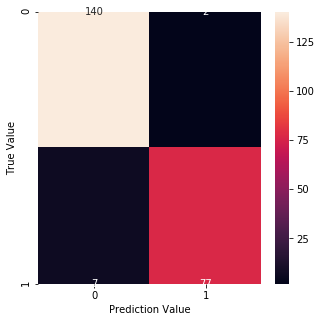

In [35]:
# Vizualition of Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True,fmt=".0f")
plt.xlabel("Prediction Value")
plt.ylabel("True Value")
plt.show()

## Comparison of Algorithm Performance

In [36]:
print("Logistic Regression Classification score :",lrc.score(x_test,y_test)*100)
print("KNN score :",knn.score(x_test,y_test)*100)
print("SVC score :",svc.score(x_test,y_test)*100)
print("Naive Boyes score :",nb.score(x_test,y_test)*100)
print("Decision Tree Score :",dt.score(x_test,y_test)*100)
print("Random Forest Classification Score :",rf.score(x_test,y_test)*100)

Logistic Regression Classification score : 94.69026548672566
KNN score : 95.13274336283186
SVC score : 96.01769911504425
Naive Boyes score : 96.90265486725663
Decision Tree Score : 94.69026548672566
Random Forest Classification Score : 96.01769911504425
